# Artificial Neural Network

### Importing the libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [27]:
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [28]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [29]:
# take a look at the dataset and show the first 5 rows
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
# take a look at the dataset and show the last 5 rows
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [31]:
# Check for NaN under an entire DataFrame:
dataset.isnull().values.any()

False

In [32]:
# show the mean of customer's balance.

df1 = dataset[["Balance"]].mean()
df2 = dataset[["Balance"]].std()
print(f"Customer balance on average is {int(df1)} +/- {int(df2)} $")


Customer balance on average is 76485 +/- 62397 $


In [33]:
# show the mean of customer's age.

df1 = dataset[["Age"]].mean()
df2 = dataset[["Age"]].std()
print(f"Customer age on average is {int(df1)} +/- {int(df2)} ")


Customer age on average is 38 +/- 10 


In [34]:
# show the mean of customer's estimated salary.

df1 = dataset[["EstimatedSalary"]].mean()
df2 = dataset[["EstimatedSalary"]].std()
print(f"Customer Estimated Salary on average is {int(df1)} +/- {int(df2)} $")


Customer Estimated Salary on average is 100090 +/- 57510 $


In [35]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [36]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data (from non-numerical values to numerical values)

Label Encoding the "Gender" column

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [43]:
# female was encoded into zero and male was encoded into one.
print(X)


[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [40]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling to all indexes.

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
print(X_train)

[[-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   1.10643166]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -0.74866447]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.41231994]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
   0.84432121]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   0.32472465]]


## Part 2 - Building the ANN

### Initializing the ANN

In [51]:
ann = tf.keras.models.Sequential()

2022-03-29 18:12:03.956870: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Adding the input layer and the first hidden layer

In [52]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) # I chose the 6 neurons.

### Adding the second hidden layer

In [53]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [94]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # # sigmoid activation function and 1 neuron to encode that binary class 0 or 1.

## Part 3 - Training the ANN

### Compiling the ANN

In [55]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [56]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.7958
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4684 - accuracy: 0.8012
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.8087
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.8138
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8177
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8221
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8265
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8270
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8307
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3946 - accura

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation


Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 800

Gender: Female

Age: 50 years old

Tenure: 10 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 500000

So, should we say goodbye to that customer ?

**Solution**

In [92]:
# Predicting if the customr left the bank? 

result = (ann.predict(sc.transform([[1,0,0,800,0,50,10,60000,2,1,1,500000]]))>0.5) # use 0.5 as we used the sigmoid activation function in the putput layer

if result == [[False]]:
    print("Customer stays in the bank")
elif result == [[True]]:
    print("Customer left the bank")

Customer stays in the bank


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [89]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1516   79]
 [ 191  214]]


0.865

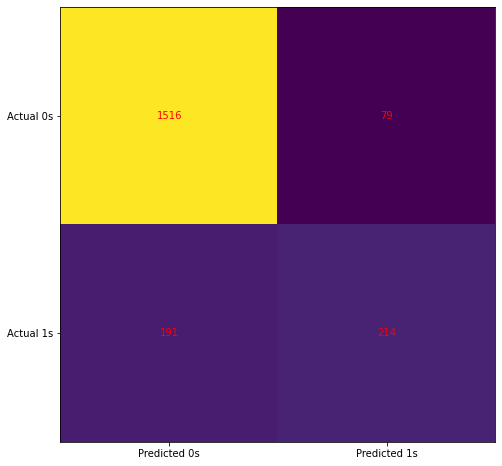

In [91]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()